In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rotten-fruit/fruit.jpeg
/kaggle/input/detectoor/FruitHealthDetector (1).pt


In [8]:
import cv2

img = cv2.imread("fruit.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

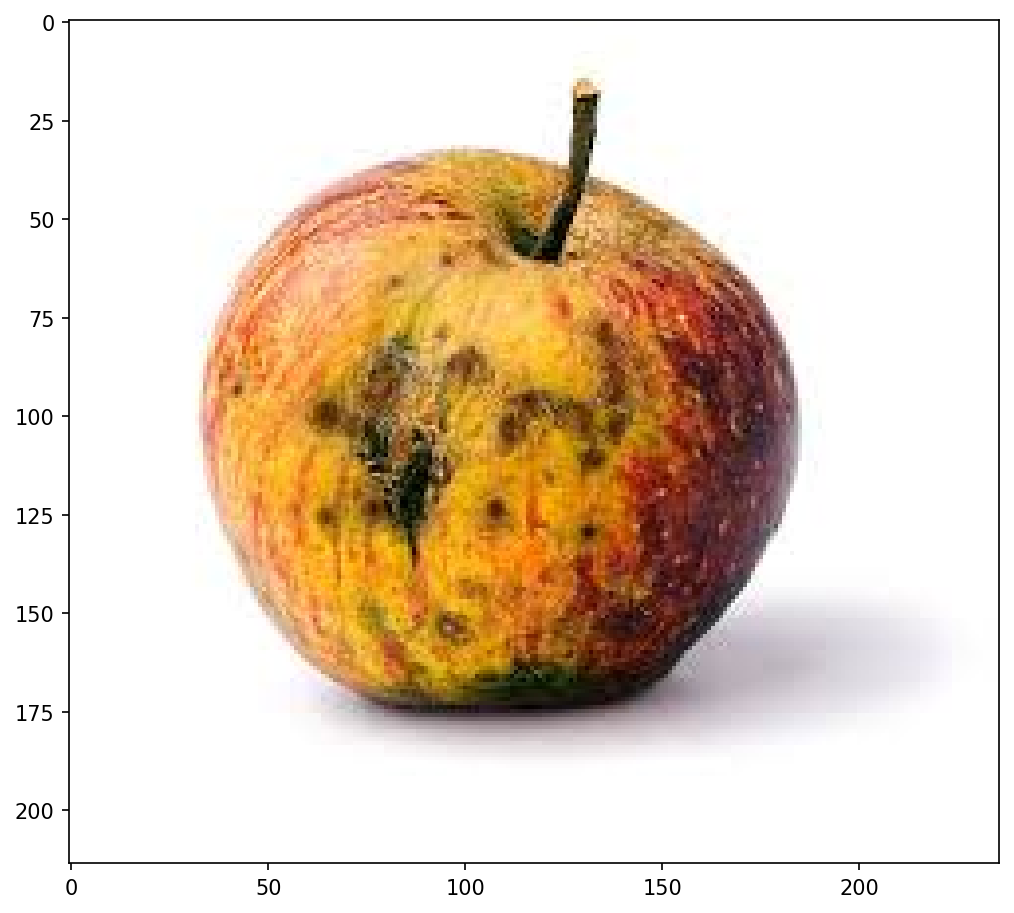

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8),dpi=150)
plt.imshow(img)

In [10]:
from torchvision import transforms

transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.7321, 0.6322, 0.5291),
        (0.3302, 0.3432, 0.3701))
])

In [11]:
img = cv2.resize(img,(32, 32))
img_as_tensor = transformations(img)

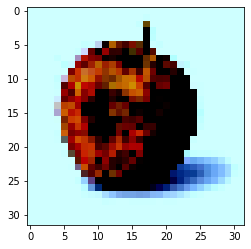

In [12]:
img = img_as_tensor.permute(1,2,0)
plt.imshow(img)

In [13]:
import torch.nn as nn

In [14]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(16,8,kernel_size=3,padding=1)
        self.fc1 = nn.Linear(8*8*8,32)
        self.fc2 = nn.Linear(32,2)
    def forward(self,x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
        out = out.view(-1,8*8*8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
    
model = Model()

In [15]:
import torch

model.load_state_dict(torch.load("FruitHealthDetector.pt"))

<All keys matched successfully>

In [16]:
model.eval()

Model(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=512, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [21]:
import torch.nn.functional as F
#img_as_tensor = img_as_tensor.unsqueeze(1)
print(img_as_tensor.size())
out = model(img_as_tensor.unsqueeze(0))
print(out)
_,predicted = torch.max(out,dim=1)
print(predicted)

torch.Size([3, 32, 32])
tensor([[-3.0208,  2.5920]], grad_fn=<AddmmBackward>)
tensor([1])


In [19]:
s = nn.Softmax(dim=1)
out = s(model(img_as_tensor.unsqueeze(0)))
print(out)

tensor([[0.0036, 0.9964]], grad_fn=<SoftmaxBackward>)
